In [1]:
import tensorflow as tf

# Load the trained model
model_path = "C:\\Users\\Adarshajay\\Documents\\python\\trained_blazepose_model.keras"
model = tf.keras.models.load_model(model_path)

In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model_path = "C:\\Users\\Adarshajay\\Documents\\python\\trained_blazepose_model.keras"
model = load_model(model_path)

# Open the video file
video_path = "C:\\Users\\Adarshajay\\Downloads\\Peri Adavu _ 1_ Lesson no 55 _Learn Bharatnatyam.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
    exit()

# Loop through the frames of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame (resize to match the model input shape and convert to grayscale)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert the frame to grayscale
    frame_gray = cv2.resize(frame_gray, (34, 34))  # Resize the frame to match the model input shape
    frame_gray = frame_gray.reshape((1, 34))  # Reshape to match model input shape

    # Make prediction using the model
    prediction = model.predict(frame_gray)

    # Analyze the prediction and compare with your desired criteria
    # You can perform any further processing or analysis here

    # Display the frame (optional)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close any open windows
cap.release()
cv2.destroyAllWindows()


ValueError: cannot reshape array of size 1156 into shape (1,34)

In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model_path = "C:\\Users\\Adarshajay\\Documents\\python\\trained_blazepose_model.keras"
model = load_model(model_path)

# Open the video file
video_path = "C:\\Users\\Adarshajay\\Downloads\\Peri Adavu _ 1_ Lesson no 55 _Learn Bharatnatyam.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
    exit()

# Loop through the frames of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame (resize to match the model input shape and convert to grayscale)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert the frame to grayscale
    frame_gray_resized = cv2.resize(frame_gray, (34, 34))  # Resize the frame to match the model input shape
    frame_gray_normalized = frame_gray_resized.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    frame_gray_expanded = np.expand_dims(frame_gray_normalized, axis=0)  # Add batch dimension

    # Make prediction using the model
    prediction = model.predict(frame_gray_expanded)

    # Analyze the prediction and compare with your desired criteria
    # You can perform any further processing or analysis here

    # Display the frame (optional)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close any open windows
cap.release()
cv2.destroyAllWindows()


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 34, 34), dtype=float32). Expected shape (None, 34), but input has incompatible shape (1, 34, 34)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 34, 34), dtype=float32)
  • training=False
  • mask=None

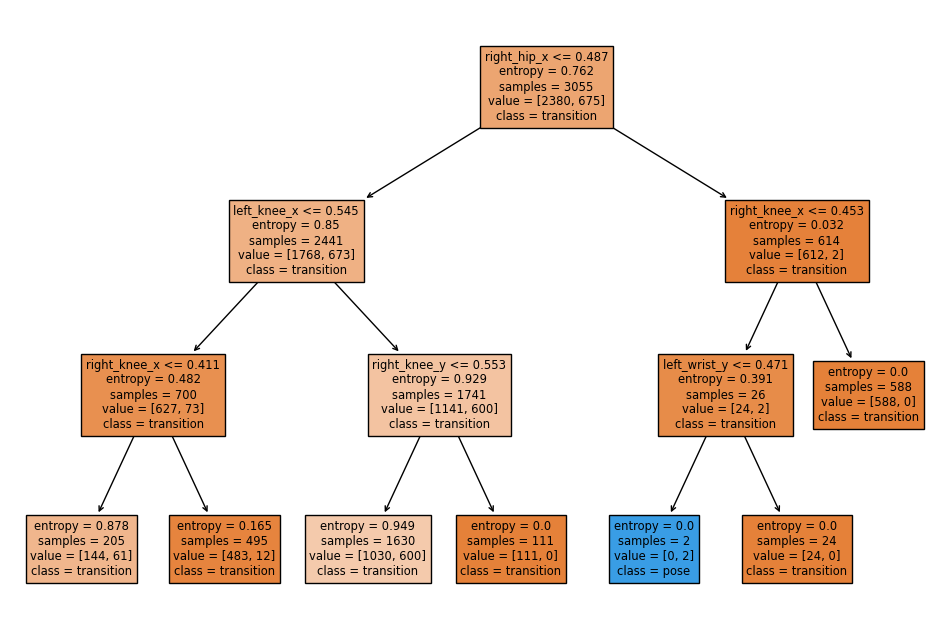

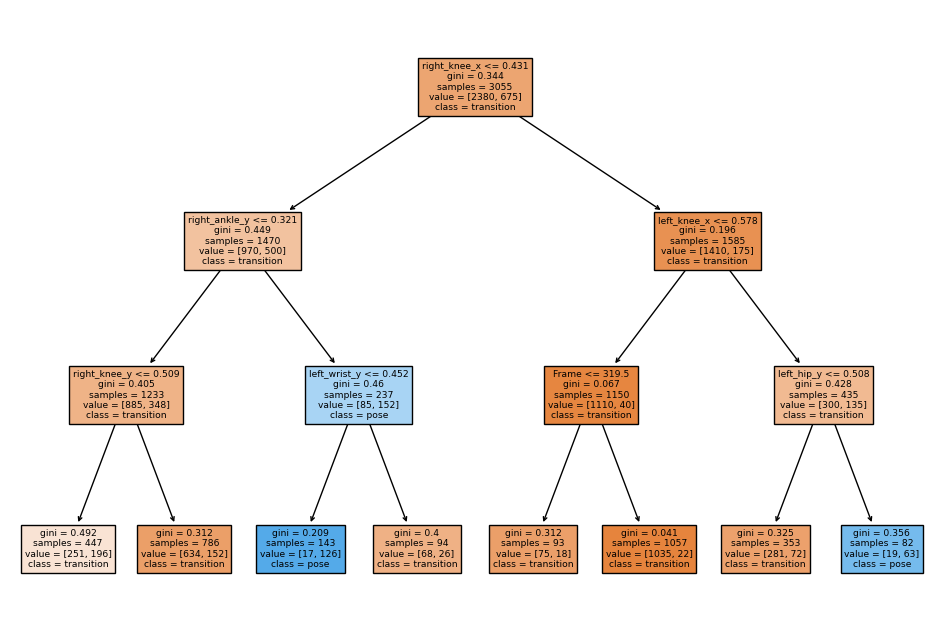

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load the dataset (replace the file path with the location of your BlazePose data)
file_path = "C:\\Users\\Adarshajay\\Downloads\\Dataset video\\Final\\pose_datafinal - PT - Copy.csv"
df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = df.drop(['target'], axis=1)  # Assuming 'target' column contains labels (0 for transition, 1 for pose)
y = df['target']

# Split the dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize Decision Tree classifiers (ID3 and CART)
dt_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_cart = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train the models
dt_id3.fit(X_train, y_train)
dt_cart.fit(X_train, y_train)

# Evaluate model performance using cross-validation
scores_id3 = cross_val_score(dt_id3, X_train, y_train, cv=5)
scores_cart = cross_val_score(dt_cart, X_train, y_train, cv=5)

# Plot decision trees
plt.figure(figsize=(12, 8))
plot_tree(dt_id3, filled=True, feature_names=X.columns.tolist(), class_names=['transition', 'pose'])
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(dt_cart, filled=True, feature_names=X.columns.tolist(), class_names=['transition', 'pose'])
plt.show()
